## Basic Housing Model

This is a basic housing model based on features that the average person in Ames Iowa should be able to find about their house.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics

### Data
We're using data from the Ames Iowa data set from the Ames, Iowa Assessor's Office. <br>
data dictionary: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = 'train.csv' 

In [3]:
houses = pd.read_csv('./datasets/' + data)

In [4]:
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
houses.shape

(2051, 81)

In [6]:
houses.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [7]:
houses.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
houses.corr()['SalePrice']
# some values dont appear to have very strong correlation with sale price so we should consider dropping them
# e.g.  Id, Bsmtfin Sf 2, Low Qual Fin Sf, Bsmt Half Bath, 3Ssn Porch, Pool Area, Misc Val, Mo Sold, Yr sold 

Id                -0.051398
PID               -0.255052
MS SubClass       -0.087335
Lot Frontage       0.341842
Lot Area           0.296566
Overall Qual       0.800207
Overall Cond      -0.097019
Year Built         0.571849
Year Remod/Add     0.550370
Mas Vnr Area       0.512230
BsmtFin SF 1       0.423519
BsmtFin SF 2       0.016255
Bsmt Unf SF        0.190210
Total Bsmt SF      0.628925
1st Flr SF         0.618486
2nd Flr SF         0.248452
Low Qual Fin SF   -0.041594
Gr Liv Area        0.697038
Bsmt Full Bath     0.283662
Bsmt Half Bath    -0.045328
Full Bath          0.537969
Half Bath          0.283001
Bedroom AbvGr      0.137067
Kitchen AbvGr     -0.125444
TotRms AbvGrd      0.504014
Fireplaces         0.471093
Garage Yr Blt      0.533922
Garage Cars        0.648220
Garage Area        0.650270
Wood Deck SF       0.326490
Open Porch SF      0.333476
Enclosed Porch    -0.135656
3Ssn Porch         0.048732
Screen Porch       0.134581
Pool Area          0.023106
Misc Val          -0

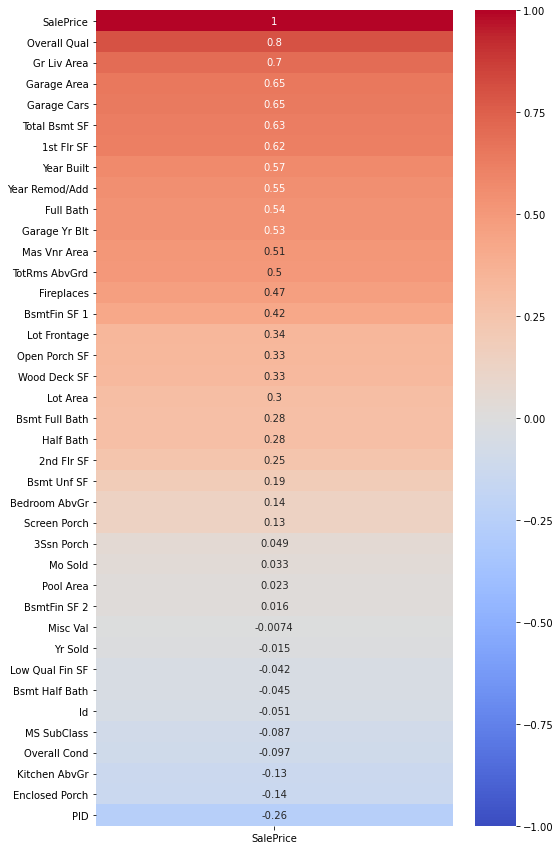

In [9]:
plt.figure(figsize = [8, 15])
sns.heatmap(houses.corr()[['SalePrice']].sort_values(by='SalePrice', ascending = False), 
            vmin = -1, 
            vmax = 1, 
            annot = True, 
            cmap = 'coolwarm');

### Correlations
The correlation graph seems to show that there are some pretty heavily correlated pieces of data, Garage Cars, <br>Garage Area, Enclosed Porch Screen Porch etc.<br>
that might need to be removed in order to make a good model. There are also a few that are very <br>
weakly correlated with price that might need to be removed in order to optimize our model.

In [10]:
houses.nunique()

Id              2051
PID             2051
MS SubClass       16
MS Zoning          7
Lot Frontage     118
                ... 
Misc Val          28
Mo Sold           12
Yr Sold            5
Sale Type          9
SalePrice        828
Length: 81, dtype: int64

In [11]:
null_counts = houses.isnull().sum()
null_counts[null_counts > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

### Linearity
Looking at some of the most heavily coorelated values there appears to be a pretty strong linear relationship between <br>
those values and saleprice which should allow a linear regression model to fit well

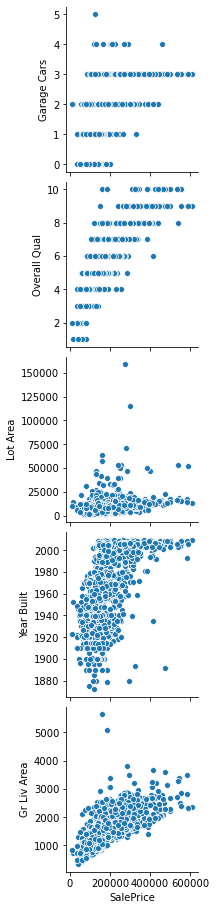

In [12]:
sns.pairplot(houses,
             y_vars = ['Garage Cars', 
                       'Overall Qual',
                       'Lot Area',  
                       'Year Built', 
                       'Gr Liv Area'], 
             x_vars = ['SalePrice']);

### Outliers
There are some substantial outliers in Lot Area that probably need to be dealt with but aside from that <br>
the most correlated features seem to be workable 

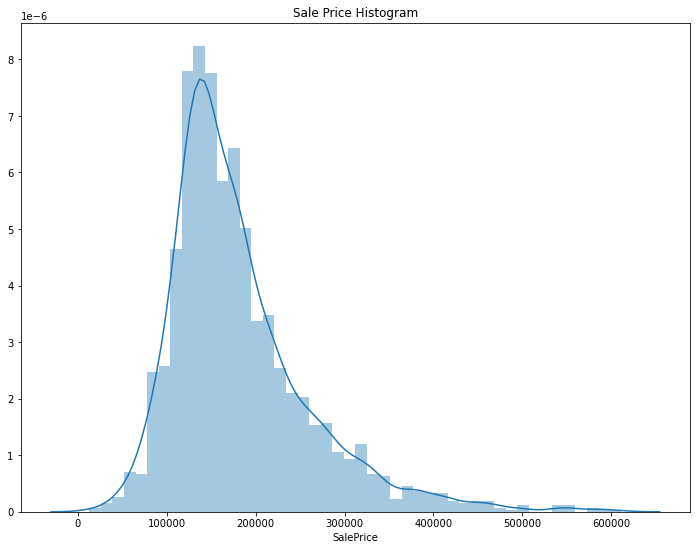

In [13]:
plt.figure(figsize = [12, 9])
sns.distplot(houses['SalePrice']);
plt.title('Sale Price Histogram');

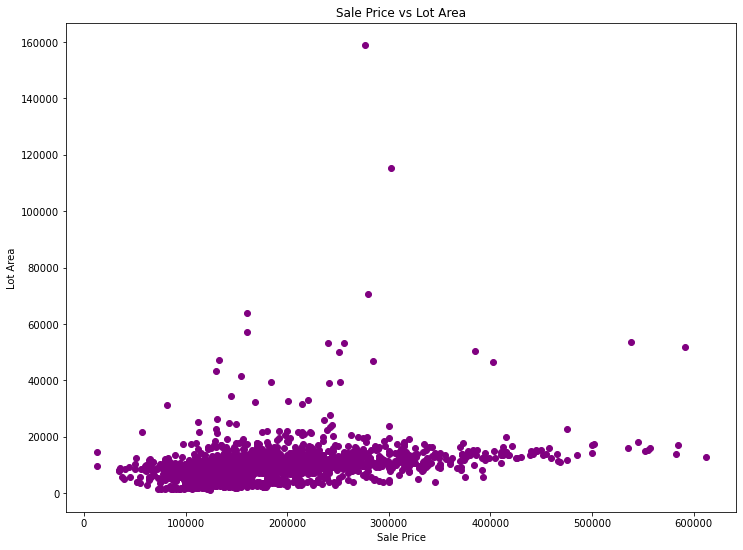

In [14]:
plt.figure(figsize = [12, 9])
plt.scatter(houses['SalePrice'], houses['Lot Area'], c = 'purple')
plt.title('Sale Price vs Lot Area')
plt.ylabel('Lot Area')
plt.xlabel('Sale Price');

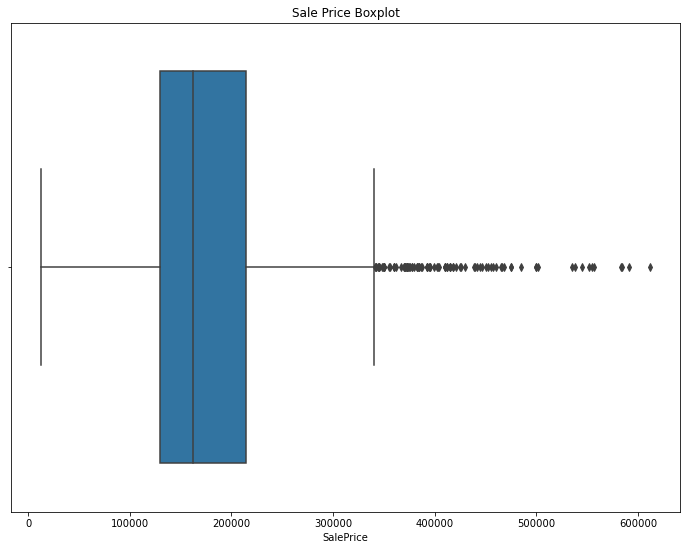

In [15]:
plt.figure(figsize = [12, 9])
sns.boxplot(houses['SalePrice'])
plt.title('Sale Price Boxplot');

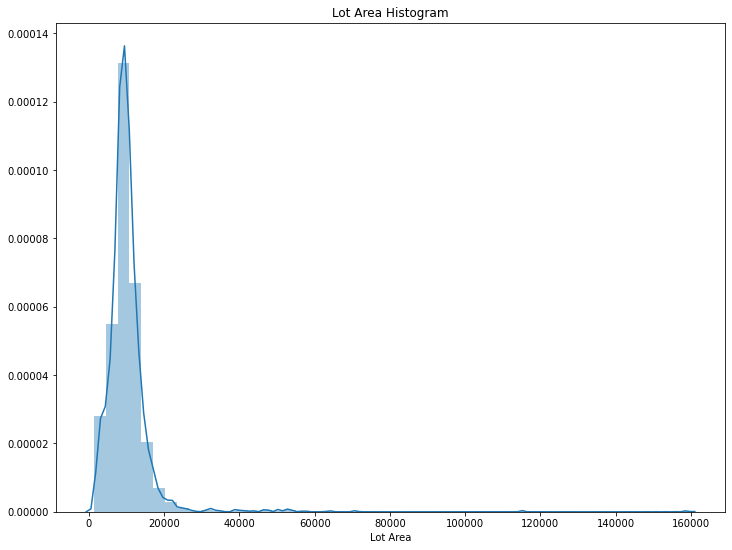

In [16]:
plt.figure(figsize = [12, 9])
sns.distplot(houses['Lot Area']) # there appear to be some major outliars in lot area
plt.title('Lot Area Histogram');

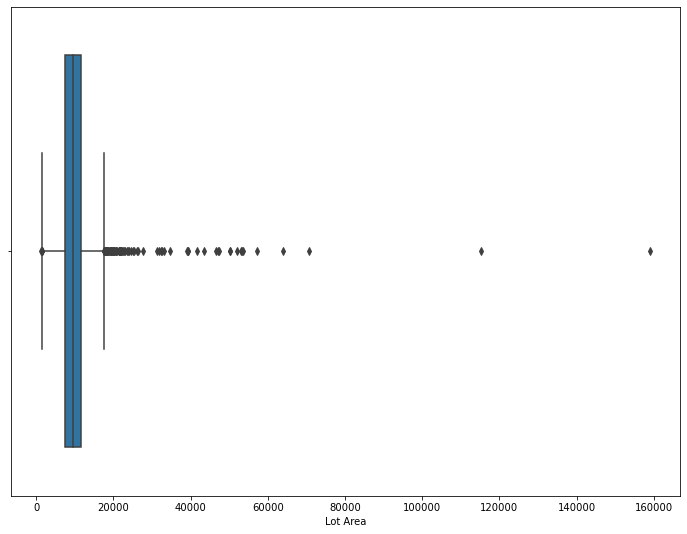

In [17]:
plt.figure(figsize = [12, 9])
sns.boxplot(houses['Lot Area']); # just verifying that there are some substantial outliars